(array([ 8., 14.,  8.,  9.,  4.,  4.,  0.,  0.,  1.,  2.]),
 array([10.93079075, 12.53468895, 14.13858715, 15.74248535, 17.34638356,
        18.95028176, 20.55417996, 22.15807816, 23.76197636, 25.36587457,
        26.96977277]),
 <BarContainer object of 10 artists>)

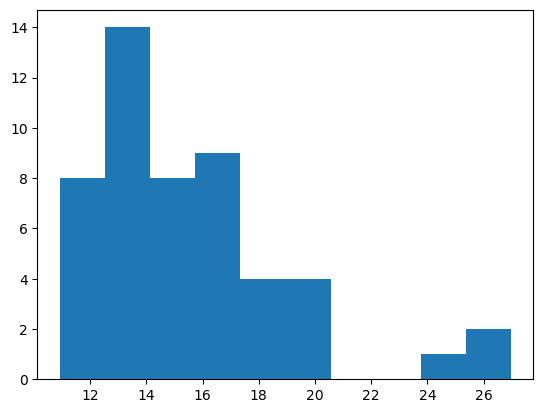

In [7]:
# Indlæs numpy, pandas og matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Starttider

# Filadresser til data
start_1_address = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 9 og 10 - biler\bdata.xlsx"
start_2_address = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 9 og 10 - biler\b2data.xlsx"

# Indlæs den anden kolonne i excel filerne
start_1 = pd.read_excel(start_1_address, usecols=[1])
start_2 = pd.read_excel(start_2_address, usecols=[1])

# Konverter til numpy arrays
start_1 = start_1.to_numpy()
start_2 = start_2.to_numpy()

# Gør det samme for sluttider
slut_1_address = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 9 og 10 - biler\Første.xlsx"
slut_2_address = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 9 og 10 - biler\Anden.xlsx"

# Indlæs den anden kolonne i excel filerne
slut_1 = pd.read_excel(slut_1_address, usecols=[1])
slut_2 = pd.read_excel(slut_2_address, usecols=[1])

# Konverter til numpy arrays
slut_1 = slut_1.to_numpy()
slut_2 = slut_2.to_numpy()

l = 20

v = lambda t1, t2 : l/(t2-t1)

plt.hist(v(start_2, slut_2))


In [25]:
# Indlæs numpy, pandas og matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Indlæs delta_tider
delta_tider1 = pd.read_excel(r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\dbata.xlsx").to_numpy()
delta_tider2 = pd.read_excel(r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\dbata2.xlsx").to_numpy()

delta_tider = np.append(delta_tider1, delta_tider2)

l = 6.03
dl = 0.2
dt = 0.2

v_gennemsnit = np.mean([l / tid for tid in delta_tider])

# Calculate mean velocity
v = l / delta_tider

# Calculate uncertainty in velocity
dv = v * np.sqrt((dl / l)**2 + (dt / delta_tider)**2)

plt.hist(v)

(array([ 7.13971043,  7.48619278,  8.13077218,  8.67154483,  8.3210406 ,
         8.16229188,  9.09085303,  7.8651613 , 10.42280831,  7.1210113 ,
         9.29759176,  7.88761249,  8.57630535,  7.03861163,  6.64173656,
         7.17034397,  6.00225767,  6.06634335,  6.38104782,  5.85689345,
         6.17555828,  6.01857787,  8.36859554, 12.53909379, 13.98886999,
        11.96347765, 11.85941121,  9.11026158, 10.29444215, 10.51484584,
         8.7118449 ,  8.66872424,  7.84819898,  9.55185617,  9.91099618,
        10.28408199,  8.34331886,  7.16468495,  7.666012  ,  7.55636296,
         7.35445674,  6.31198881,  7.33734529,  9.70247426, 13.43691127,
         9.15287785,  9.76996052,  9.59538614,  9.06415025,  8.21898879,
         7.82485751, 10.30196894,  9.98554308,  9.1338845 ,  8.36166762,
         9.32657018,  8.25168208,  7.797277  ,  7.13049938, 10.88699449,
         9.14101511,  9.90617872,  7.07703308,  8.79978411,  7.21561264,
         6.70893892,  7.071463  ,  7.8162462 ,  7.4